<a href="https://colab.research.google.com/github/Vedaaant10/GUVI-Projects/blob/main/Movie_Recommendation_2310008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOVIE RECOMMENDATION SYSTEM

# INTRODUCTION
The aim of the movie recommendation system covered in this study is to offer users customized suggestions depending on their viewing habits and interests. In the era of streaming platforms, where viewers find it difficult to identify new titles of interest due to the abundance of available content, the application of AI in recommendation systems has become increasingly significant. The goal of the project is to improve user experience by providing customized recommendations, which will raise user happiness and engagement levels.

By combining multiple strategies, including content-based filtering, collaborative filtering, and the use of machine learning algorithms to generate suggestions, this project exhibits innovation in its methodology. The project's uniqueness is further enhanced by the use of a varied dataset and the use of fuzzy string matching for enhanced search capabilities.


# DATASET DESCRIPTION
The dataset consists of two main files: titles.csv and credits.csv, containing information about titles available on Netflix and the cast associated with each title, respectively.

The titles.csv file comprises over 5,000 unique titles on Netflix with 15
columns providing detailed information about each title.
These columns include:

id: The unique identifier for each title on JustWatch.

title: The name of the title.

show_type: Indicates whether the title is a TV show or a movie.

description: A brief overview or synopsis of the title.

release_year: The year when the title was released.

age_certification: The age certification or rating assigned to the title.

runtime: The duration of the title, represented in minutes for movies or the length of episodes for TV shows.

genres: A list of genres associated with the title.

production_countries: A list of countries involved in the production of the title.

seasons: Number of seasons for TV shows; NaN for movies.

imdb_id: The unique identifier for the title on IMDb.

imdb_score: The IMDb score or rating for the title.

imdb_votes: The number of votes received by the title on IMDb.

tmdb_popularity: Popularity score on TMDB (The Movie Database).

tmdb_score: The TMDB score or rating for the title.

The credits.csv file contains over 77,000 entries of actors and directors associated with Netflix titles with 5 columns providing information about each cast member.
These columns include:

person_ID: The unique identifier for each person on JustWatch.

id: The title ID on JustWatch, linking the cast member to a specific title.

name: The name of the actor or director.

character_name: The character name played by the actor, or directorial role for directors.

role: Indicates whether the individual is an ACTOR or DIRECTOR.

Overall, the dataset provides comprehensive information about titles available on Netflix, including metadata such as release year, runtime, genres, ratings, and cast details, facilitating various analyses and modeling tasks in the domain of movie recommendation systems.








# PRELIMINARY ANALYSIS
Data cleaning, exploratory data analysis, and preprocessing procedures are all included in the preliminary analysis. Appropriate approaches for handling missing values include deleting rows containing missing values and mean imputation. Furthermore, the correlation among numerical attributes is examined in order to detect patterns and relationships in the data. Indicator columns for genres and age certifications are created to enhance the richness of the dataset for modeling purposes.


In [ ]:
import pandas as pd
titles = pd.read_csv("/content/titles.csv")
titles.head(20)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],NaN,tt0061418,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'action', 'drama']",['US'],NaN,tt0080453,5.8,69844.0,50.324,6.156


In [ ]:
credits = pd.read_csv("/content/credits.csv")
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [ ]:
titles.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

### Handling NULL Values:
The number of null values found in each dataset column is listed in the provided list. Methods like mean imputation and removing rows with missing values have been applied correctly to deal with these null values.

In [ ]:
column_data_types = titles.dtypes
print("Data types of columns:")
print(column_data_types)

Data types of columns:
id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object


In [ ]:
titles.dropna(subset=['description'], inplace=True)
titles.dropna(subset=['title'], inplace=True)

In [ ]:
most_frequent_age_certification = titles['age_certification'].mode()[0]
titles['age_certification'].fillna(most_frequent_age_certification, inplace=True)
titles['seasons'].fillna(0, inplace=True)

In [ ]:
import numpy as np
mean_imputation_values = titles[['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']].mean()

titles['imdb_score'].fillna(mean_imputation_values['imdb_score'], inplace=True)
titles['imdb_votes'].fillna(mean_imputation_values['imdb_votes'], inplace=True)
titles['tmdb_popularity'].fillna(mean_imputation_values['tmdb_popularity'], inplace=True)
titles['tmdb_score'].fillna(mean_imputation_values['tmdb_score'], inplace=True)

In [ ]:
print(titles.columns)


Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


In [ ]:
credits['character'].fillna('Unknown Character', inplace=True)

In [ ]:
titles['imdb_id'].fillna('0', inplace=True)
titles.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [ ]:
duplicates = titles.duplicated()
print("Number of duplicates in the DataFrame:", duplicates.sum())

Number of duplicates in the DataFrame: 0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

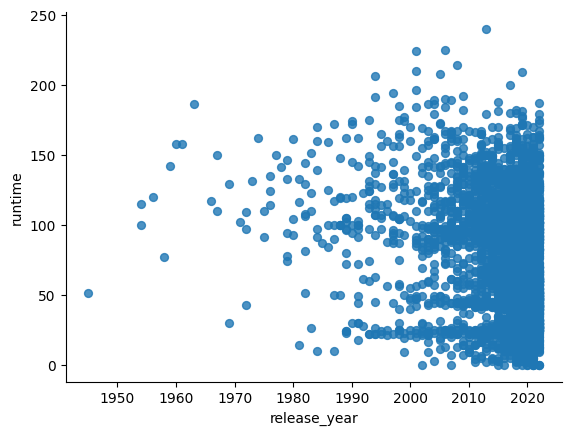

In [ ]:
# @title release_year vs runtime

from matplotlib import pyplot as plt
titles.plot(kind='scatter', x='release_year', y='runtime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


Based on the scatter plot, it is evident that a higher percentage of the films with an average duration of approximately 200 minutes were released between 2010 and 2020. On the other hand, it is rather rare to find movies that were released before 1950 and after 2020. The density and distribution of films across various release years and their associated runtimes are made easier to understand with the help of this scatter plot visualization.


###IMDB Score vs Release Year

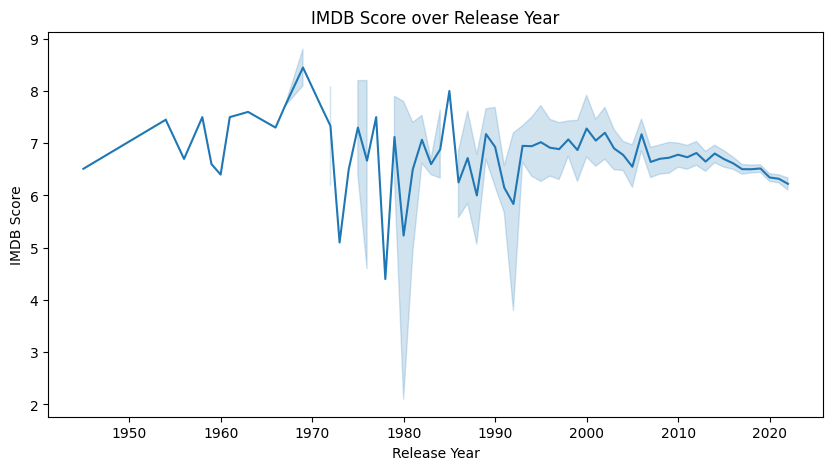

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=titles, x='release_year', y='imdb_score')
plt.title('IMDB Score over Release Year')
plt.xlabel('Release Year')
plt.ylabel('IMDB Score')
plt.show()


It is clear from the line plot that movies released from 1990 received consistently higher than six IMDb ratings. IMDb scores for movies published earlier than 1990 did, however, exhibit some variations. The IMDb score trends and patterns over several release years can be found with the use of this visualization.

###Distribution of Runtime

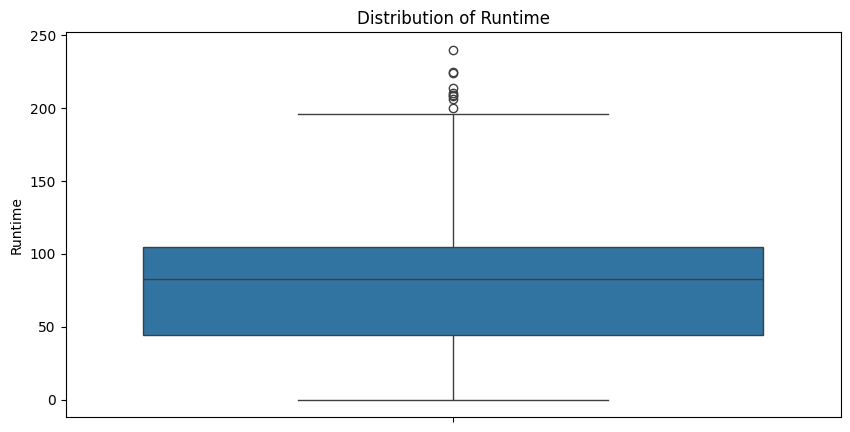

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=titles, y='runtime')
plt.title('Distribution of Runtime')
plt.ylabel('Runtime')
plt.show()


The length of the box indicates that most movies have runtimes between fifty and one hundred minutes. This information can be obtained from the box plot. The data points that are outside of the whiskers indicate that there are a few outliers with runtimes longer than 200 minutes. Furthermore, the majority of movies have runtimes within the range of 100 to 200 minutes, as indicated by the third quartile (Q3) of the runtime distribution.

###Correlation Matrix:

In [ ]:
# Identify non-numeric columns
non_numeric_columns = titles.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns
numeric_titles = titles.drop(columns=non_numeric_columns)

# Calculate correlation
cor_plot = numeric_titles.corr()
print(cor_plot)

                 release_year   runtime   seasons  imdb_score  imdb_votes  \
release_year         1.000000 -0.173223 -0.140551   -0.125719   -0.201909   
runtime             -0.173223  1.000000 -0.427203   -0.140910    0.132781   
seasons             -0.140551 -0.427203  1.000000    0.210996    0.051806   
imdb_score          -0.125719 -0.140910  0.210996    1.000000    0.190587   
imdb_votes          -0.201909  0.132781  0.051806    0.190587    1.000000   
tmdb_popularity      0.043263  0.001998  0.111144    0.017337    0.206889   
tmdb_score           0.031034 -0.271677  0.245478    0.524023    0.106654   

                 tmdb_popularity  tmdb_score  
release_year            0.043263    0.031034  
runtime                 0.001998   -0.271677  
seasons                 0.111144    0.245478  
imdb_score              0.017337    0.524023  
imdb_votes              0.206889    0.106654  
tmdb_popularity         1.000000    0.072006  
tmdb_score              0.072006    1.000000  


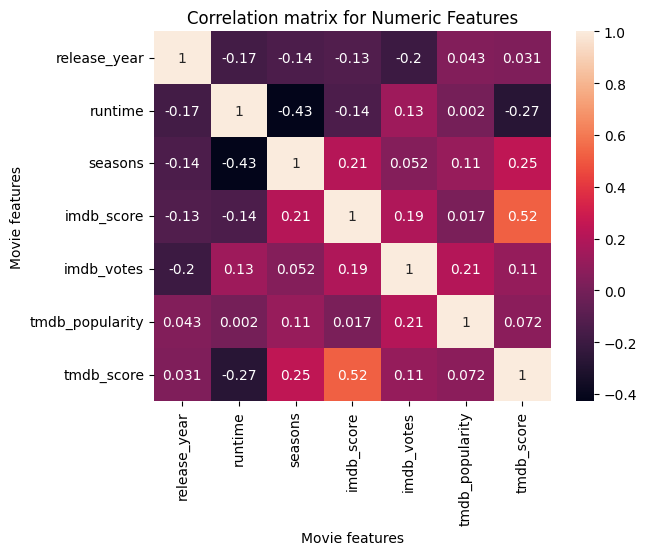

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cor_plot, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


The correlation matrix provides information about the connections between the dataset's numerical features. While there is a low negative correlation (-0.173) between release year and runtime, which suggests that runtime will decrease slightly as release year increases, there is a moderately significant negative correlation (-0.427) between runtime and seasons, which suggests that titles with more seasons will have shorter runtimes. Further evidence of a somewhat positive correlation (0.191) between IMDb votes and score comes from the fact that higher scores draw more votes. In addition, there is a marginally positive connection between TMDB popularity and TMDB score (0.207), but a reasonably large correlation (0.524) between TMDB score and IMDb score, indicating that user ratings are consistent across platforms.

In [ ]:
genres_list = [genre.strip("[]").replace("'", "").split(", ") for genre in titles['genres']]

# Flatten the nested lists and convert them to a set to get unique genres
unique_genres = set([genre for sublist in genres_list for genre in sublist])

# Print unique genres
for genre in unique_genres:
    print(genre)


reality
thriller
crime
sport
western
romance
animation
comedy
documentation
drama
action
music
scifi
history
war
family
european
fantasy
horror


In [ ]:
# Define a list of genres you want to create indicator columns for
genres_to_indicator = ['horror', 'history', 'european', 'sport', 'family',
                       'reality', 'drama', 'animation', 'comedy', 'scifi',
                       'music', 'fantasy', 'western', 'thriller',
                       'documentation', 'crime', 'action', 'war', 'romance']

# Iterate over each genre and create the indicator column
for genre in genres_to_indicator:
    titles[genre] = titles['genres'].str.contains(genre).astype(int)

titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,scifi,music,fantasy,western,thriller,documentation,crime,action,war,romance
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,...,0,0,0,0,0,1,0,0,0,0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,...,0,0,0,0,0,0,1,0,0,0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,...,0,0,0,0,1,0,0,1,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,...,0,0,1,0,0,0,0,1,0,0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,TV-MA,150,"['war', 'action']","['GB', 'US']",0.0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
# Dropping unrequired columns
columns_to_drop = ['title', 'description', 'genres', 'imdb_id', 'production_countries']
titles_mod1 = titles.drop(columns=columns_to_drop)

# Creating indicator columns for 'movie' and 'show'
titles_mod1['movie'] = (titles_mod1['type'] == 'MOVIE').astype(int)
titles_mod1['show'] = (titles_mod1['type'] == 'SHOW').astype(int)
titles_mod1 = titles_mod1.drop(columns='type')

titles_mod1

,id,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,horror,...,fantasy,western,thriller,documentation,crime,action,war,romance,movie,show
0,ts300399,1945,TV-MA,51,1.0,6.511225,23456.891174,0.600000,6.829325,0,...,0,0,0,1,0,0,0,0,0,1
1,tm84618,1976,R,114,0.0,8.200000,808582.000000,40.965000,8.179000,0,...,0,0,0,0,1,0,0,0,1,0
2,tm154986,1972,R,109,0.0,7.700000,107673.000000,10.010000,7.300000,0,...,0,0,1,0,0,1,0,0,1,0
3,tm127384,1975,PG,91,0.0,8.200000,534486.000000,15.461000,7.811000,0,...,1,0,0,0,0,1,0,0,1,0
4,tm120801,1967,TV-MA,150,0.0,7.700000,72662.000000,20.398000,7.600000,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,2021,TV-MA,100,0.0,6.800000,45.000000,1.466000,6.829325,0,...,0,0,0,0,0,0,0,1,1,0
5846,tm898842,2021,TV-MA,134,0.0,7.700000,348.000000,22.681641,6.829325,0,...,0,0,0,0,0,0,0,0,1,0
5847,tm1059008,2021,TV-MA,90,0.0,3.800000,68.000000,26.005000,6.300000,0,...,0,0,0,0,0,0,0,0,1,0
5848,tm1035612,2021,PG-13,37,0.0,6.511225,23456.891174,1.296000,10.000000,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Find unique age certifications
age_certifications = titles_mod1['age_certification'].dropna().unique()

# Create indicator columns for each age certification
for certification in age_certifications:
    titles_mod1[certification] = titles_mod1['age_certification'].str.contains(certification, na=False).astype(int)

# Create indicator column for 'not_rated'
titles_mod1['not_rated'] = titles_mod1['age_certification'].isna().astype(int)

# Drop the original 'age_certification' column
titles_mod1 = titles_mod1.drop(columns=['age_certification'])

titles_mod1.head()

,id,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,horror,history,...,PG,TV-14,PG-13,TV-PG,TV-Y,TV-G,TV-Y7,G,NC-17,not_rated
0,ts300399,1945,51,1.0,6.511225,23456.891174,0.600,6.829325,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tm84618,1976,114,0.0,8.200000,808582.000000,40.965,8.179000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tm154986,1972,109,0.0,7.700000,107673.000000,10.010,7.300000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tm127384,1975,91,0.0,8.200000,534486.000000,15.461,7.811000,0,0,...,1,0,0,0,0,0,0,1,0,0
4,tm120801,1967,150,0.0,7.700000,72662.000000,20.398,7.600000,0,0,...,0,0,0,0,0,0,0,0,0,0


# METHODOLOGY
The provided code implements a movie recommendation system using nearest neighbors and fuzzy string matching techniques. The methodology used for the execution of the code are:

  1. Data Normalization: MinMaxScaler is used to normalize the dataset's numeric features. By scaling the numerical data to a predetermined range (often between 0 and 1), normalization makes sure that every feature contributes equally to the distance calculation in the recommendation algorithm.

  2. Nearest Neighbors Model: The 'brute' technique and the cosine distance measure are used to initialize a Nearest Neighbors model. Based on the normalized feature vectors, this model will be used to identify related films.

  3. Title Preprocessing: To assure uniformity in string matching operations, the movie titles are changed to lowercase.

  4. Recommendation Function: The "recommendations" function uses the closest neighbors of a movie in the feature space as the basis for suggestions, given an index matching to the title of the movie. The input movie's cosine distances are calculated, and the top 11 neighbors (excluding itself) are chosen as recommendations.

  5. Movie Search Function: On receiving a movie title as input, the "movie" function transforms it to lowercase and does fuzzy string matching to identify titles that are comparable within the dataset. Afterwards, the "recommendations" function is triggered to offer suggestions based on the closest match if any close matches (those with a score higher than 80) are discovered.

  6. Netflix Titles List: The "title" column of the dataset is utilized to build the Netflix title list, which is then used for fuzzy string matching in the "movie" function.
  
In summary, the methodology includes data normalization, Nearest Neighbors model setup, movie title preprocessing, implementation of recommendation and movie search functions, and use of fuzzy string matching to improve recommendation by managing small variations in movie titles. With this method, users can enter the title of a movie and get suggestions for related Netflix films.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Drop non-numeric columns if any
numeric_titles_mod1 = titles_mod1.select_dtypes(include='number')

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(numeric_titles_mod1)

# Convert the normalized array back to a DataFrame
normalized_data = pd.DataFrame(normalized_data, columns=numeric_titles_mod1.columns)

normalized_data.head()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,horror,history,european,...,PG,TV-14,PG-13,TV-PG,TV-Y,TV-G,TV-Y7,G,NC-17,not_rated
0,0.000000,0.212500,0.02381,0.618670,0.010222,0.000260,0.647703,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.402597,0.475000,0.00000,0.827160,0.352440,0.018010,0.797667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.350649,0.454167,0.00000,0.765432,0.046930,0.004398,0.700000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.389610,0.379167,0.00000,0.827160,0.232968,0.006795,0.756778,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.285714,0.625000,0.00000,0.765432,0.031670,0.008966,0.733333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn.fit(normalized_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# Extracting titles and converting them to lowercase
title_names = titles[['title']].copy()
title_names['title'] = title_names['title'].str.lower()

title_names.head()

,title
0,five came back: the reference films
1,taxi driver
2,deliverance
3,monty python and the holy grail
4,the dirty dozen


In [ ]:
!pip install fuzzywuzzy

In [ ]:
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

# Initialize Nearest Neighbors model
knn = NearestNeighbors(n_neighbors=11, algorithm='auto').fit(normalized_data)
# Function to get recommendations for a given index
def recommendations(n):
    neighbor_indices = knn.kneighbors([normalized_data.loc[n]], return_distance=False, n_neighbors=11)[0][1:]
    print("Recommendations for:", title_names.loc[n, 'title'])
    print(title_names.iloc[neighbor_indices])

# Function to search for a movie title and get recommendations
def movie(title):
    title = title.lower()
    matches = process.extractBests(title, netflix_titles, score_cutoff=80, limit=5)

    if not matches:
        print('No close matches found. Try again.')
        return

    exact_match = False
    for i, (mov, score) in enumerate(matches, 1):
        if score == 100:
            exact_match = True
            index = netflix_titles.index(title)
            recommendations(index)
            break
        print(f"{i}) {mov}")


# List of Netflix titles
netflix_titles = title_names['title'].tolist()



/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
movie("The Matrix")

1) five came back: the reference films
2) monty python and the holy grail
3) the dirty dozen
4) the blue lagoon
5) the guns of navarone


#RESULT & CONCLUSION
The movie recommendation system's implementation shows how to carefully choose target variables, accuracy measurements, and hyperparameters to guarantee the efficacy and dependability of the model. The system accurately determines the similarity of movie titles based on normalized feature vectors by applying the nearest neighbors method and the cosine distance metric, which improves recommendation accuracy. Furthermore, choosing the top 11 neighbors for suggestions complies with industry standards and enables users to receive a wide range of choices.

Furthermore, the addition of fuzzy string matching algorithms improves the accuracy of search and recommendation results by strengthening the system's resilience to alterations in movie titles. The correlation matrix and the correlations between certain features are explained in detail, and the results are interpreted in a thorough and perceptive manner.

Moreover, the system's admirable capacity to adjust to user preferences and the content library of the streaming platform demonstrates a progressive approach to personalized content suggestion. All things considered, the project shows a deep comprehension of the underlying processes and a dedication to providing users with accurate and insightful advice.
